In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('babies(preprocessed).csv')

In [3]:
dataset

,age,gestation,parity,height,weight,smoke,bwt
0,27.0,284.000000,0,62.0,100.0,0.0,120
1,33.0,282.000000,0,64.0,135.0,0.0,113
2,28.0,279.000000,0,64.0,115.0,1.0,128
3,36.0,279.338512,0,69.0,190.0,0.0,123
4,23.0,282.000000,0,67.0,125.0,1.0,108
...,...,...,...,...,...,...,...
1231,27.0,275.000000,1,60.0,100.0,0.0,113
1232,24.0,265.000000,0,67.0,120.0,0.0,128
1233,30.0,291.000000,0,65.0,150.0,1.0,130
1234,21.0,281.000000,1,65.0,110.0,0.0,125


In [4]:
dataset.isnull().sum()

age          0
gestation    0
parity       0
height       0
weight       0
smoke        0
bwt          0
dtype: int64

In [5]:
X = dataset.drop('bwt', axis=1)
y = dataset['bwt']

# 1. Logistic Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

______________________________________
Fold 1:
Mean Squared Error (MSE): 251.35
Mean Absolute Error (MAE): 12.44
R-squared (R2): 0.28
Peak Signal-to-Noise Ratio (PSNR): 20.91 dB
Signal-to-Noise Ratio (SNR): 48.57 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 233.27
Mean Absolute Error (MAE): 12.04
R-squared (R2): 0.18
Peak Signal-to-Noise Ratio (PSNR): 21.23 dB
Signal-to-Noise Ratio (SNR): 48.89 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 243.74
Mean Absolute Error (MAE): 12.26
R-squared (R2): 0.18
Peak Signal-to-Noise Ratio (PSNR): 21.04 dB
Signal-to-Noise Ratio (SNR): 48.70 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 289.59
Mean Absolute Error (MAE): 13.38
R-squared (R2): 0.09
Peak Signal-to-Noise Ratio (PSNR): 20.29 dB
Signal-to-Noise Ratio (SNR): 47.96 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 250.87
Mean Absolute Error (MAE): 12.44
R-squared (R2): 0.25
Pe

# 1. Bagging

In [7]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Create a Bagging Regressor
    bagging_model = BaggingRegressor(base_estimator=rf_model, n_estimators=10, random_state=42)
    
    # Train the Bagging Regressor
    bagging_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = bagging_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')

C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 1:
Mean Squared Error (MSE): 253.94
Mean Absolute Error (MAE): 12.37
R-squared (R2): 0.27
Peak Signal-to-Noise Ratio (PSNR): 20.86 dB
Signal-to-Noise Ratio (SNR): 48.53 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 2:
Mean Squared Error (MSE): 260.97
Mean Absolute Error (MAE): 12.79
R-squared (R2): 0.09
Peak Signal-to-Noise Ratio (PSNR): 20.74 dB
Signal-to-Noise Ratio (SNR): 48.41 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 3:
Mean Squared Error (MSE): 259.20
Mean Absolute Error (MAE): 12.57
R-squared (R2): 0.13
Peak Signal-to-Noise Ratio (PSNR): 20.77 dB
Signal-to-Noise Ratio (SNR): 48.44 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 4:
Mean Squared Error (MSE): 292.39
Mean Absolute Error (MAE): 13.40
R-squared (R2): 0.08
Peak Signal-to-Noise Ratio (PSNR): 20.25 dB
Signal-to-Noise Ratio (SNR): 47.91 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 5:
Mean Squared Error (MSE): 263.20
Mean Absolute Error (MAE): 12.77
R-squared (R2): 0.21
Peak Signal-to-Noise Ratio (PSNR): 20.71 dB
Signal-to-Noise Ratio (SNR): 48.37 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 6:
Mean Squared Error (MSE): 262.66
Mean Absolute Error (MAE): 12.89
R-squared (R2): 0.14
Peak Signal-to-Noise Ratio (PSNR): 20.72 dB
Signal-to-Noise Ratio (SNR): 48.38 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 7:
Mean Squared Error (MSE): 234.42
Mean Absolute Error (MAE): 11.95
R-squared (R2): 0.22
Peak Signal-to-Noise Ratio (PSNR): 21.21 dB
Signal-to-Noise Ratio (SNR): 48.87 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 8:
Mean Squared Error (MSE): 273.93
Mean Absolute Error (MAE): 13.09
R-squared (R2): 0.19
Peak Signal-to-Noise Ratio (PSNR): 20.53 dB
Signal-to-Noise Ratio (SNR): 48.20 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 9:
Mean Squared Error (MSE): 293.61
Mean Absolute Error (MAE): 13.44
R-squared (R2): 0.17
Peak Signal-to-Noise Ratio (PSNR): 20.23 dB
Signal-to-Noise Ratio (SNR): 47.90 dB


C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


______________________________________
Fold 10:
Mean Squared Error (MSE): 267.31
Mean Absolute Error (MAE): 12.41
R-squared (R2): 0.22
Peak Signal-to-Noise Ratio (PSNR): 20.64 dB
Signal-to-Noise Ratio (SNR): 48.30 dB

Average Metrics Across Folds:
Mean Squared Error (MSE): 266.16
Mean Absolute Error (MAE): 12.77
R-squared (R2): 0.17
Peak Signal-to-Noise Ratio (PSNR): 20.67 dB
Signal-to-Noise Ratio (SNR): 48.33 dB


# 2. Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create a Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the Random Forest Regressor
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = rf_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')

______________________________________
Fold 1:
Mean Squared Error (MSE): 276.23
Mean Absolute Error (MAE): 12.90
R-squared (R2): 0.21
Peak Signal-to-Noise Ratio (PSNR): 20.50 dB
Signal-to-Noise Ratio (SNR): 48.16 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 289.49
Mean Absolute Error (MAE): 13.58
R-squared (R2): -0.01
Peak Signal-to-Noise Ratio (PSNR): 20.29 dB
Signal-to-Noise Ratio (SNR): 47.96 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 288.61
Mean Absolute Error (MAE): 13.37
R-squared (R2): 0.03
Peak Signal-to-Noise Ratio (PSNR): 20.31 dB
Signal-to-Noise Ratio (SNR): 47.97 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 316.93
Mean Absolute Error (MAE): 13.93
R-squared (R2): -0.00
Peak Signal-to-Noise Ratio (PSNR): 19.90 dB
Signal-to-Noise Ratio (SNR): 47.56 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 277.20
Mean Absolute Error (MAE): 13.08
R-squared (R2): 0.17


# 3. Voting

In [9]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    
    # Create a Voting Regressor
    voting_model = VotingRegressor([('random_forest', rf_model), ('linear_regression', lr_model)])
    
    # Train the Voting Regressor
    voting_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = voting_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')

______________________________________
Fold 1:
Mean Squared Error (MSE): 250.09
Mean Absolute Error (MAE): 12.31
R-squared (R2): 0.28
Peak Signal-to-Noise Ratio (PSNR): 20.93 dB
Signal-to-Noise Ratio (SNR): 48.59 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 246.96
Mean Absolute Error (MAE): 12.49
R-squared (R2): 0.14
Peak Signal-to-Noise Ratio (PSNR): 20.98 dB
Signal-to-Noise Ratio (SNR): 48.65 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 254.42
Mean Absolute Error (MAE): 12.48
R-squared (R2): 0.15
Peak Signal-to-Noise Ratio (PSNR): 20.85 dB
Signal-to-Noise Ratio (SNR): 48.52 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 294.58
Mean Absolute Error (MAE): 13.56
R-squared (R2): 0.07
Peak Signal-to-Noise Ratio (PSNR): 20.22 dB
Signal-to-Noise Ratio (SNR): 47.88 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 252.71
Mean Absolute Error (MAE): 12.46
R-squared (R2): 0.24
Pe

# 4. XGBOOST

In [10]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=i)  # Use reg:squarederror for regression
    
    # Create a Voting Regressor
    voting_model = VotingRegressor([('random_forest', rf_model), ('linear_regression', lr_model), ('xgboost', xgb_model)])
    
    # Train the Voting Regressor
    voting_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = voting_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')


______________________________________
Fold 1:
Mean Squared Error (MSE): 253.77
Mean Absolute Error (MAE): 12.39
R-squared (R2): 0.27
Peak Signal-to-Noise Ratio (PSNR): 20.87 dB
Signal-to-Noise Ratio (SNR): 48.53 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 265.43
Mean Absolute Error (MAE): 12.86
R-squared (R2): 0.07
Peak Signal-to-Noise Ratio (PSNR): 20.67 dB
Signal-to-Noise Ratio (SNR): 48.33 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 263.59
Mean Absolute Error (MAE): 12.60
R-squared (R2): 0.12
Peak Signal-to-Noise Ratio (PSNR): 20.70 dB
Signal-to-Noise Ratio (SNR): 48.36 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 305.09
Mean Absolute Error (MAE): 13.69
R-squared (R2): 0.04
Peak Signal-to-Noise Ratio (PSNR): 20.07 dB
Signal-to-Noise Ratio (SNR): 47.73 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 268.14
Mean Absolute Error (MAE): 12.80
R-squared (R2): 0.20
Pe

# 5. Stacking

In [11]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=i)  # Use reg:squarederror for regression
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[('random_forest', rf_model), ('linear_regression', lr_model), ('xgboost', xgb_model)],
        final_estimator=LinearRegression()  # You can use a different final estimator
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')


______________________________________
Fold 1:
Mean Squared Error (MSE): 246.24
Mean Absolute Error (MAE): 12.28
R-squared (R2): 0.29
Peak Signal-to-Noise Ratio (PSNR): 21.00 dB
Signal-to-Noise Ratio (SNR): 48.66 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 240.34
Mean Absolute Error (MAE): 12.26
R-squared (R2): 0.16
Peak Signal-to-Noise Ratio (PSNR): 21.10 dB
Signal-to-Noise Ratio (SNR): 48.76 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 247.62
Mean Absolute Error (MAE): 12.31
R-squared (R2): 0.17
Peak Signal-to-Noise Ratio (PSNR): 20.97 dB
Signal-to-Noise Ratio (SNR): 48.64 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 290.43
Mean Absolute Error (MAE): 13.46
R-squared (R2): 0.08
Peak Signal-to-Noise Ratio (PSNR): 20.28 dB
Signal-to-Noise Ratio (SNR): 47.94 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 249.45
Mean Absolute Error (MAE): 12.38
R-squared (R2): 0.25
Pe

# 6. GBDT

In [12]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=i)  # Use GradientBoostingRegressor for GBDT
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[('random_forest', rf_model), ('linear_regression', lr_model), ('gbdt', gbdt_model)],
        final_estimator=LinearRegression()  # You can use a different final estimator
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Additional metrics for signal quality
    psnr = 10 * np.log10(np.max(y) ** 2 / mse)
    snr = 10 * np.log10(np.sum(y ** 2) / mse)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    psnr_list.append(psnr)
    snr_list.append(snr)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB')
    print(f'Signal-to-Noise Ratio (SNR): {snr:.2f} dB')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {np.mean(psnr_list):.2f} dB')
print(f'Signal-to-Noise Ratio (SNR): {np.mean(snr_list):.2f} dB')


______________________________________
Fold 1:
Mean Squared Error (MSE): 231.50
Mean Absolute Error (MAE): 11.97
R-squared (R2): 0.33
Peak Signal-to-Noise Ratio (PSNR): 21.26 dB
Signal-to-Noise Ratio (SNR): 48.93 dB
______________________________________
Fold 2:
Mean Squared Error (MSE): 235.27
Mean Absolute Error (MAE): 12.16
R-squared (R2): 0.18
Peak Signal-to-Noise Ratio (PSNR): 21.19 dB
Signal-to-Noise Ratio (SNR): 48.86 dB
______________________________________
Fold 3:
Mean Squared Error (MSE): 244.46
Mean Absolute Error (MAE): 12.30
R-squared (R2): 0.18
Peak Signal-to-Noise Ratio (PSNR): 21.03 dB
Signal-to-Noise Ratio (SNR): 48.69 dB
______________________________________
Fold 4:
Mean Squared Error (MSE): 288.58
Mean Absolute Error (MAE): 13.36
R-squared (R2): 0.09
Peak Signal-to-Noise Ratio (PSNR): 20.31 dB
Signal-to-Noise Ratio (SNR): 47.97 dB
______________________________________
Fold 5:
Mean Squared Error (MSE): 241.13
Mean Absolute Error (MAE): 12.19
R-squared (R2): 0.28
Pe

______________________________________
Fold 1:
Mean Squared Error (MSE): 231.50
Mean Absolute Error (MAE): 11.97
R-squared (R2): 0.33
______________________________________
Fold 2:
Mean Squared Error (MSE): 235.27
Mean Absolute Error (MAE): 12.16
R-squared (R2): 0.18
______________________________________
Fold 3:
Mean Squared Error (MSE): 244.46
Mean Absolute Error (MAE): 12.30
R-squared (R2): 0.18
______________________________________
Fold 4:
Mean Squared Error (MSE): 288.58
Mean Absolute Error (MAE): 13.36
R-squared (R2): 0.09
______________________________________
Fold 5:
Mean Squared Error (MSE): 241.13
Mean Absolute Error (MAE): 12.19
R-squared (R2): 0.28
______________________________________
Fold 6:
Mean Squared Error (MSE): 237.52
Mean Absolute Error (MAE): 12.21
R-squared (R2): 0.22
______________________________________
Fold 7:
Mean Squared Error (MSE): 232.36
Mean Absolute Error (MAE): 11.76
R-squared (R2): 0.23
______________________________________
Fold 8:
Mean Squared Er

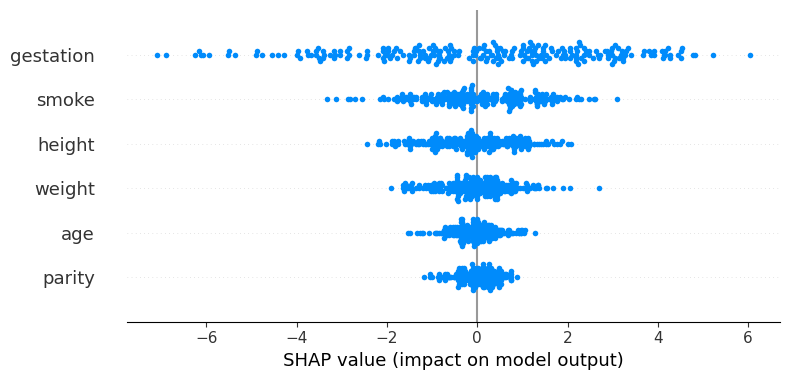

In [13]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import shap

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

# Initialize SHAP values
shap_values_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.preprocessing import StandardScaler
    # Standardize the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=i)  # Use GradientBoostingRegressor for GBDT
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[('random_forest', rf_model), ('linear_regression', lr_model), ('gbdt', gbdt_model)],
        final_estimator=LinearRegression()  # You can use a different final estimator
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Get SHAP values using TreeExplainer
    explainer = shap.TreeExplainer(stacking_model.named_estimators_['gbdt'])  # Use any of the base models, e.g., 'gbdt'
    shap_values = explainer.shap_values(X_test)
    shap_values_list.append(shap_values)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')

# Average SHAP values across folds
avg_shap_values = np.mean(shap_values_list, axis=0)

# Summary plot of SHAP values
shap.summary_plot(avg_shap_values, feature_names=X.columns)


______________________________________
Fold 1:
Mean Squared Error (MSE): 231.16
Mean Absolute Error (MAE): 11.97
R-squared (R2): 0.34


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 2:
Mean Squared Error (MSE): 234.76
Mean Absolute Error (MAE): 12.15
R-squared (R2): 0.18


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 3:
Mean Squared Error (MSE): 244.46
Mean Absolute Error (MAE): 12.30
R-squared (R2): 0.18


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 4:
Mean Squared Error (MSE): 288.97
Mean Absolute Error (MAE): 13.37
R-squared (R2): 0.09


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 5:
Mean Squared Error (MSE): 241.56
Mean Absolute Error (MAE): 12.20
R-squared (R2): 0.28


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 6:
Mean Squared Error (MSE): 237.06
Mean Absolute Error (MAE): 12.19
R-squared (R2): 0.22


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 7:
Mean Squared Error (MSE): 231.88
Mean Absolute Error (MAE): 11.75
R-squared (R2): 0.23


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 8:
Mean Squared Error (MSE): 242.44
Mean Absolute Error (MAE): 12.18
R-squared (R2): 0.29


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 9:
Mean Squared Error (MSE): 277.50
Mean Absolute Error (MAE): 12.98
R-squared (R2): 0.21


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


______________________________________
Fold 10:
Mean Squared Error (MSE): 242.80
Mean Absolute Error (MAE): 11.83
R-squared (R2): 0.29


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



Average Metrics Across Folds:
Mean Squared Error (MSE): 247.26
Mean Absolute Error (MAE): 12.29
R-squared (R2): 0.23


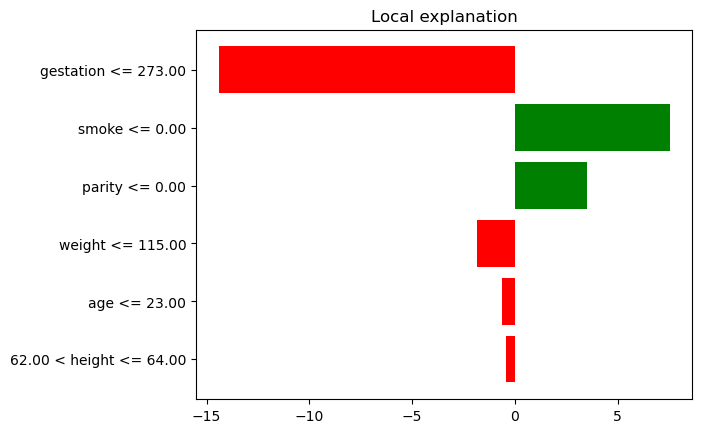

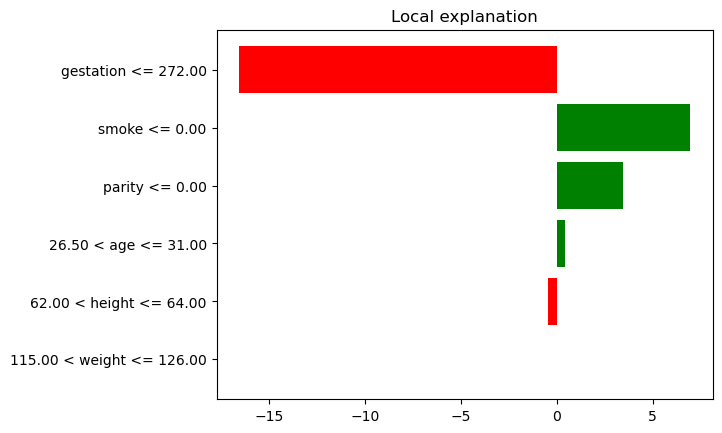

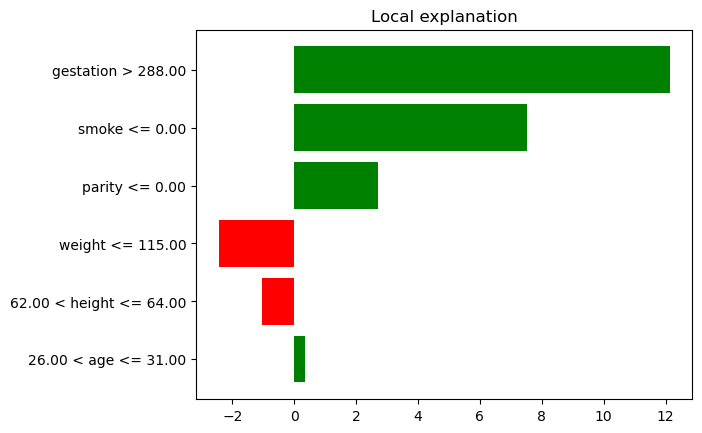

In [14]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import lime
import lime.lime_tabular

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

# Initialize Lime explanations
lime_explanations_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=i)  # Use GradientBoostingRegressor for GBDT
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[('random_forest', rf_model), ('linear_regression', lr_model), ('gbdt', gbdt_model)],
        final_estimator=LinearRegression()  # You can use a different final estimator
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    
    # Lime explanation
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='regression', feature_names=X.columns)
    explanation = explainer.explain_instance(X_test.iloc[0].values, stacking_model.predict, num_features=len(X.columns))
    lime_explanations_list.append(explanation)

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')

# Display Lime explanation plots for a few folds
for i, explanation in enumerate(lime_explanations_list[:3]):
    explanation.as_pyplot_figure()


In [15]:
import shap

# Define a function that takes a DataFrame as input and returns predictions
stacking_model_predict = lambda x: stacking_model.predict(x)

# SHAP summary plot
explainer = shap.Explainer(stacking_model_predict, masker=shap.maskers.Independent(X_train))
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

AttributeError: 'ExactExplainer' object has no attribute 'shap_values'

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list, psnr_list, snr_list = [], [], [], [], []

# Initialize SHAP values
shap_values_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=i)  # Use GradientBoostingRegressor for GBDT
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[('random_forest', rf_model), ('linear_regression', lr_model), ('gbdt', gbdt_model)],
        final_estimator=LinearRegression()  # You can use a different final estimator
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Get SHAP values using TreeExplainer
    explainer = shap.TreeExplainer(stacking_model.named_estimators_['gbdt'])  # Use any of the base models, e.g., 'gbdt'
    shap_values = explainer.shap_values(X_test)
    shap_values_list.append(shap_values)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Evaluate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print("______________________________________")
    print(f'Fold {i + 1}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.2f}')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.2f}')
print(f'R-squared (R2): {np.mean(r2_list):.2f}')

# Average SHAP values across folds
avg_shap_values = np.mean(shap_values_list, axis=0)

# Summary plot of SHAP values
shap.summary_plot(avg_shap_values, feature_names=X.columns)

# Waterfall plot for a specific instance (change index accordingly)
instance_index = 0
shap.waterfall_plot(shap.TreeExplainer(stacking_model.named_estimators_['gbdt']).expected_value, avg_shap_values[instance_index, :], X_test.iloc[instance_index, :], feature_names=X.columns, max_display=10)

plt.show()


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have shap_values and X_test from your code

# Choose a specific instance for the waterfall plot
instance_index = 0

# Get the expected value of the model
expected_value = explainer.expected_value

# Calculate the contributions to the prediction
contributions = np.sum(shap_values, axis=1) + expected_value

# Get feature names
feature_names = X.columns

# Create a waterfall plot
feature_order = np.argsort(np.abs(shap_values[instance_index, :]))[::-1]
cumulative_contributions = np.cumsum(shap_values[instance_index, feature_order]) + expected_value

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_order)), cumulative_contributions, color='blue')
plt.xticks(range(len(feature_order)), feature_names[feature_order], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Contributions')
plt.title('Waterfall Plot for SHAP Values')
plt.show()

In [6]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have shap_values and X_test from your code

# Choose a specific instance for the waterfall plot
instance_index = 0

# Get the expected value of the model
expected_value = explainer.expected_value

# Calculate the contributions to the prediction
contributions = np.sum(shap_values, axis=1) + expected_value

# Get feature names
feature_names = X.columns

# Create a waterfall plot using a line plot
feature_order = np.argsort(np.abs(shap_values[instance_index, :]))[::-1]
cumulative_contributions = np.cumsum(shap_values[instance_index, feature_order]) + expected_value

plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_order)), cumulative_contributions, marker='o', linestyle='-', color='blue')
plt.xticks(range(len(feature_order)), feature_names[feature_order], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Cumulative Contributions')
plt.title('Waterfall Plot for SHAP Values (Line Plot)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


NameError: name 'explainer' is not defined

# _______________________________________________________________________________________________________

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap

# Assuming X, y are your features and target variable

# Initialize metrics lists to store results for each fold
mse_list, mae_list, r2_list = [], [], []

for i in range(10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Create individual regression models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    lr_model = LinearRegression()
    gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=i)
    
    # Create a Stacking Regressor
    stacking_model = StackingCVRegressor(
        regressors=[rf_model, lr_model, gbdt_model],
        meta_regressor=LinearRegression(),
        random_state=i
    )
    
    # Train the Stacking Regressor
    stacking_model.fit(X_train, y_train)
    
    # Get SHAP values
    explainer = shap.Explainer(stacking_model)
    shap_values = explainer.shap_values(X_test)
    
    # Make predictions on the test set
    predictions = stacking_model.predict(X_test)
    
    # Calculate and store metrics
    mse_list.append(mean_squared_error(y_test, predictions))
    mae_list.append(mean_absolute_error(y_test, predictions))
    r2_list.append(r2_score(y_test, predictions))
    
# Use or analyze the generated SHAP values as needed
# Access individual explanations using shap_values
# Metrics can be accessed from mse_list, mae_list, and r2_list


ModuleNotFoundError: No module named 'mlxtend'

In [9]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 737.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 762.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 857.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 808.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 883.3 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 819.2 kB/s eta 0:00:02
   ---------- -----------------

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Get SHAP values
explainer = shap.Explainer(gbdt_model)
shap_values = explainer.shap_values(X_test)

# Make predictions on the test set
predictions = gbdt_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 238.40287514488375
Mean Absolute Error: 12.161078795239147
R-squared: 0.3147172843503082


Mean Squared Error: 238.40287514488375
Mean Absolute Error: 12.161078795239147
R-squared: 0.3147172843503082


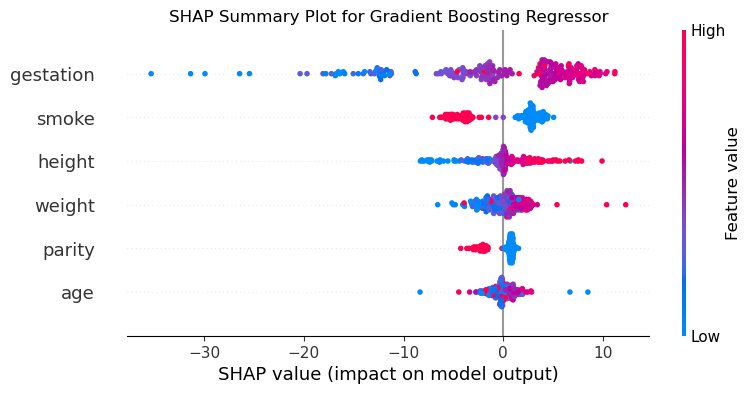

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Get SHAP values
explainer = shap.Explainer(gbdt_model)
shap_values = explainer.shap_values(X_test)

# Make predictions on the test set
predictions = gbdt_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot for Gradient Boosting Regressor')
plt.show()


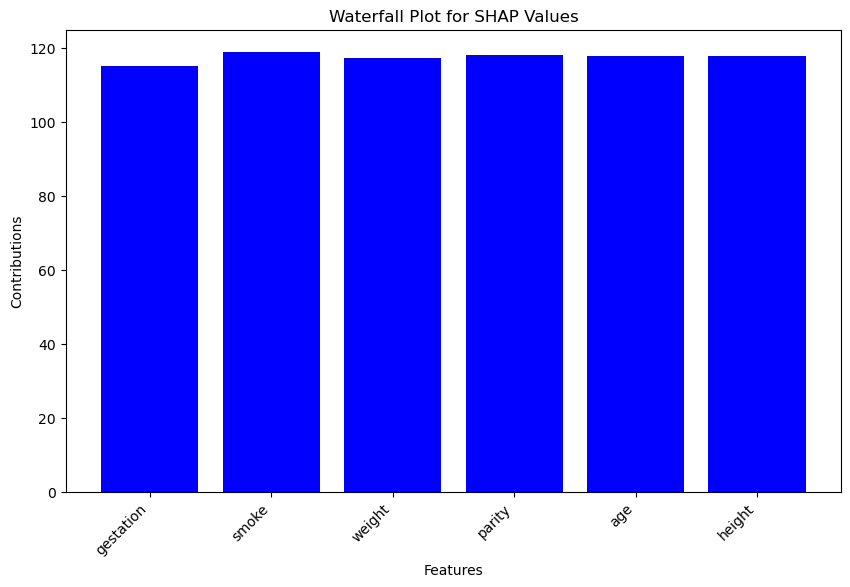

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Get SHAP values
explainer = shap.Explainer(gbdt_model)
shap_values = explainer.shap_values(X_test)

# Choose a specific instance for the waterfall plot
instance_index = 0

# Get the expected value of the model
expected_value = explainer.expected_value

# Calculate the contributions to the prediction
contributions = np.sum(shap_values, axis=1) + expected_value

# Get feature names
feature_names = X.columns

# Create a waterfall plot
feature_order = np.argsort(np.abs(shap_values[instance_index, :]))[::-1]
cumulative_contributions = np.cumsum(shap_values[instance_index, feature_order]) + expected_value

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_order)), cumulative_contributions, color='blue')
plt.xticks(range(len(feature_order)), feature_names[feature_order], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Contributions')
plt.title('Waterfall Plot for SHAP Values')
plt.show()


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Get SHAP values
explainer = shap.Explainer(gbdt_model)
shap_values = explainer.shap_values(X_test)

# Choose a specific instance for the force plot
instance_index = 0

# Get the expected value of the model
expected_value = explainer.expected_value

# Generate force plot
shap.force_plot(expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :], feature_names=X.columns)

# Display the force plot
plt.show()


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Choose a specific instance for LIME explanation
instance_index = 0
instance = X_test.iloc[instance_index, :]

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='regression', feature_names=X.columns)

# Explain the prediction for the chosen instance
lime_exp = explainer.explain_instance(instance.values, gbdt_model.predict, num_features=len(X.columns))

# Plot the LIME explanation
lime_exp.show_in_notebook(show_table=True, show_all=False)

# Alternatively, you can save the plot to an image file
# lime_exp.save_to_file('/path/to/save/lime_plot.html')


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


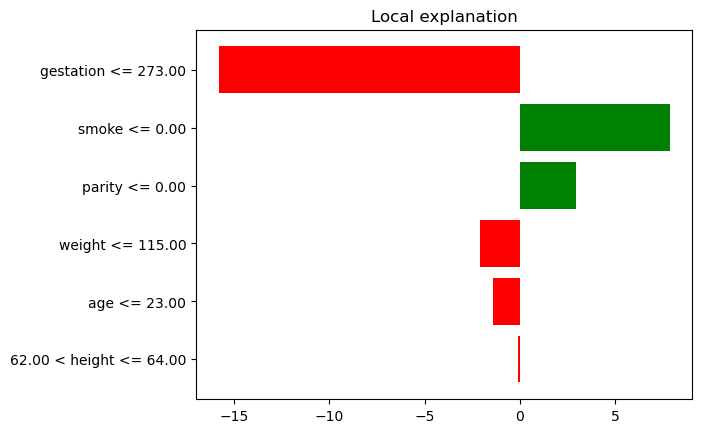

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Choose a specific instance for LIME explanation
instance_index = 0
instance = X_test.iloc[instance_index, :]

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='regression', feature_names=X.columns)

# Explain the prediction for the chosen instance
lime_exp = explainer.explain_instance(instance.values, gbdt_model.predict, num_features=len(X.columns))

# Plot the LIME explanation
lime_exp.as_pyplot_figure()

# Display the plot
plt.show()


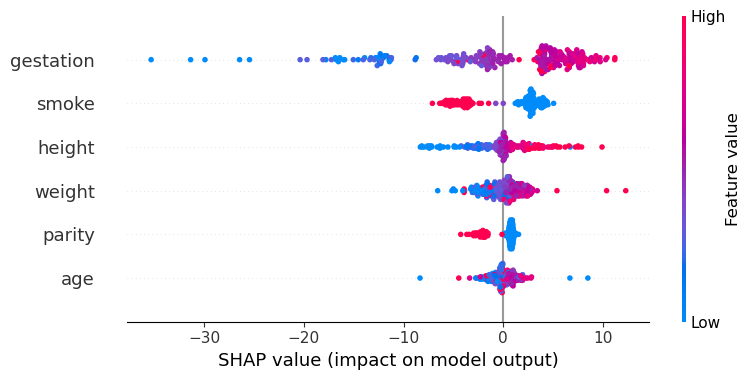

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\inspection\__init__.py)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from pycebox.ice import ice, ice_plot
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# SHAP (SHapley Additive exPlanations) Plot
explainer = shap.Explainer(gbdt_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# LIME (Local Interpretable Model-agnostic Explanations) Plot
lime_explainer = LimeTabularExplainer(X_train.values, mode='regression', feature_names=X.columns)
lime_exp = lime_explainer.explain_instance(X_test.iloc[0, :].values, gbdt_model.predict, num_features=len(X.columns))
lime_exp.show_in_notebook(show_all=False)

# PDP (Partial Dependence Plot)
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(gbdt_model, X_test, features=[0, 1, 2], grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plot')
plt.subplots_adjust(top=0.9)
plt.show()

# ICE (Individual Conditional Expectation) Plot
feature_names_ice = ['age', 'gestation', 'parity']
ice_data = ice(X_test, feature_names_ice, predict=gbdt_model.predict, num_grid_points=100)
plt.figure(figsize=(15, 6))
for i, feature_name in enumerate(feature_names_ice):
    plt.subplot(1, 3, i + 1)
    ice_plot(ice_data, feature=feature_name, c='blue', alpha=0.1, linewidth=0.5)
    plt.title(f'ICE Plot for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Model Prediction')

plt.tight_layout()
plt.show()


In [9]:
# PDP (Partial Dependence Plot)
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(gbdt_model, X_test, features=['age', 'gestation', 'parity', 'height', 'weight', 'smoke', 'bwt'], grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plot')
plt.subplots_adjust(top=0.9)
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Safiul Haque\AppData\Roaming\Python\Python311\site-packages\sklearn\inspection\__init__.py)

In [46]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 2.3 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.2 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.2 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.2 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.2 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.2 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/9.2 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.2 MB 2.0 MB/s eta 0:00:05
   ---- -------------------

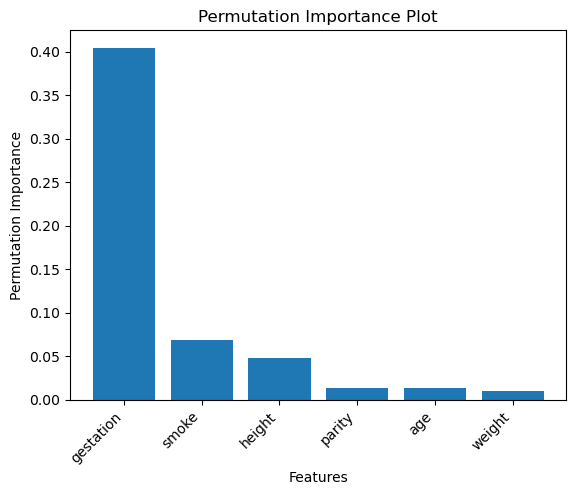

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the Gradient Boosting Regressor
gbdt_model.fit(X_train, y_train)

# Permutation Importance Plot
perm_importances = permutation_importance(gbdt_model, X_test, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X.columns

# Plot the permutation importances
sorted_idx = perm_importances.importances_mean.argsort()[::-1]
plt.bar(range(X_test.shape[1]), perm_importances.importances_mean[sorted_idx])
plt.xticks(range(X_test.shape[1]), feature_names[sorted_idx], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance Plot')
plt.show()
